<a href="https://colab.research.google.com/github/jfmra99/Redes_Neuronales/blob/master/OptimizacionNoLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optimización de funciones no lineales


## graficos

$R(x) = |x-a| + (a-x)$ 


In [0]:
def f(x, y):
    return 36 - (x**2 - 1.8)**2 + (y + 0.9)**2

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt

def F(x, y, delta):
    fxy = -f(x, y) ## función original
    R1 = (abs(math.sin(math.pi * x)))**4 + abs((math.sin(math.pi * y)))**4 ## Restriccion de enteros
    ## restriccion -4<x<5
    R21 = abs(x + 4) + (-4 - x) 
    R22 = abs(y + 4) + (-4 - y)
    R23 = abs(x - 5) - (5 - x)
    R24 = abs(y - 5) - (5 - y)
    return fxy + delta * (R1 + R21 + R22 + R23 + R24)

x = 1.0000, y = 4.00000, f(x,y) = 59.3700


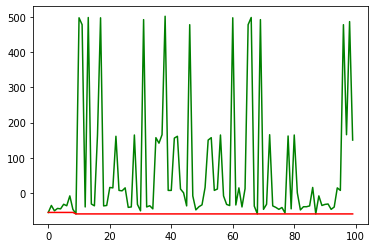

In [12]:
x_opt = None
y_opt = None
F_opt = None
f_opt = None
history_F = []
history_F_opt = []

for n in range(100):
    x = math.floor(np.random.rand() * 10 - 4)
    y = math.floor(np.random.rand() * 9 - 4)
    Fxy = F(x, y, 1000)
    fxy = f(x, y)
    if(x==6 or y==6):
      print("shame on your cow")
    
    history_F.append(Fxy)
    if f_opt is None or Fxy < F_opt:
        x_opt = x
        y_opt = y
        F_opt = Fxy
        f_opt = fxy
    history_F_opt.append(F_opt)

print('x = {:6.4f}, y = {:6.5f}, f(x,y) = {:6.4f}'.format(x_opt, y_opt, f_opt))
plt.plot(history_F, '-g');
plt.plot(history_F_opt, '-r');

x = 3.8154, y = 4.13444, f(x,y) = 70.3017


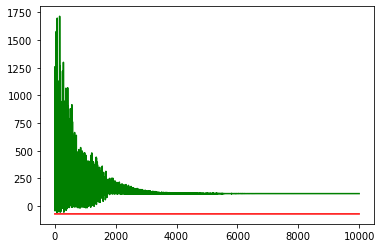

In [32]:
max_iter = 10000 # número total de iteraciones
R = 3.0         # radio inicial de búsqueda
alpha = 0.999   # factor de reducción del radio R de búsqueda
beta  = 0.95    # factor de reducción del factor de aceptación
K = 20          # factor de aceptación
delta = 100

## punto inicial aleatorio
x_opt = np.random.rand() * 9 - 4
y_opt = np.random.rand() * 9 - 4
F_opt = F(x, y, delta)
f_opt = f(x, y)

history_F = []
history_F_opt = []

## optimización
for n in range(max_iter):

    ## genera un vector unitario
    ## con dirección aleatoria
    dx = 2 * np.random.rand() - 1
    dy = 2 * np.random.rand() - 1
    d  = math.sqrt(dx**2 + dy**2)
    dx = dx / d
    dy = dy / d

    ## genera un punto aleatorio dentro de
    ## la circunferencia de radio R y con centro
    ## en el optimo actual
    x = x_opt + R * np.random.rand() * dx
    y = y_opt + R * np.random.rand() * dy
    fxy = f(x, y)
    Fxy = F(x, y, delta)

    ## calcula el delta entre el optimo actual
    ## y el punto aleatorio
    deltaF = Fxy - F_opt

    history_F.append(Fxy)
    if deltaF <= K:
        x_opt = x
        y_opt = y
        F_opt = Fxy
        f_opt = fxy
    history_F_opt.append(F_opt)

    R = R * alpha
    K = K * beta

print('x = {:6.4f}, y = {:6.5f}, f(x,y) = {:6.4f}'.format(x_opt, y_opt, f_opt))
plt.plot(history_F, '-g');
plt.plot(history_F_opt, '-r');

## Minimo para
$\lfloor x + 0.5 \rfloor^2 +  \lfloor y + 0.5 \rfloor^2$

x = -0.0042, y = 0.01142, f(x,y) = 0.0000


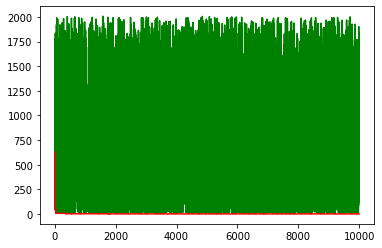

In [42]:
x_opt = None
y_opt = None
F_opt = None
f_opt = None
history_F = []
history_F_opt = []

def f(x, y):
    return math.floor(x+0.5)**2 + math.floor(y+0.5)**2
def F(x, y, delta):
    fxy = f(x, y) ## función original
    ## restriccion -4<x<5
    R1 = (abs(math.sin(math.pi * x)))**4 + abs((math.sin(math.pi * y)))**4 ## Restriccion de enteros
    R21 = abs(x + 3) + (-3 - x) 
    R22 = abs(y + 3) + (-3 - y)
    R23 = abs(x - 3) - (3 - x)
    R24 = abs(y - 3) - (3 - y)
    return fxy + delta * (R21 + R22 + R23 + R24+R1)

for n in range(10000):
    x = math.floor(np.random.rand() * 6 - 4)
    y = math.floor(np.random.rand() * 6 - 4)

    x = (np.random.rand() * 6 - 3)
    y = (np.random.rand() * 6 - 3)


    Fxy = F(x, y, 1000)
    fxy = f(x, y)
    
    history_F.append(Fxy)
    if f_opt is None or Fxy < F_opt:
        x_opt = x
        y_opt = y
        F_opt = Fxy
        f_opt = fxy
    history_F_opt.append(F_opt)

print('x = {:6.4f}, y = {:6.5f}, f(x,y) = {:6.4f}'.format(x_opt, y_opt, f_opt))
plt.plot(history_F, '-g');
plt.plot(history_F_opt, '-r');